# CT5133: Deep Learning Assignment 1 2023

Student Name(s): <b>Soumitra Koustubh Manavi, Jash Prakash Rana</b> <br>

Student ID(s): <b>22220805, 22222806</b>

### In this assignment, we will will implement a deep neural network from scratch.


Contributions within the team of 2: </br>

1] Loading Blob and Moon Dataset and Data Visualisation - Soumitra,Jash</br>
2] Explain Logistic Regression in Brief - Soumitra</br>
3] Implement Logistic Regression from Scratch -
   * Cost Function and Update weights using SGD - Soumitra
   * Forward Prop - Jash </br>
   
4] Train and Test Data on Logisitic Regression - Soumitra,Jash</br>
5] Explain Shallow Neural Network in Brief - Jash</br>
6] Implement Shallow Neural Network -
   * Forward Prop and Back Prop - Soumitra</br>
   * Update weights and Cost function using SGD - Jash</br>
   
7] Train and Test Data on Shallow Neural Network- Soumitra,Jash</br>
8] Load MNIST Dataset and filter out the data with class labels [0,9] in our case - Soumitra,Jash</br>
9] Train and Test MNIST Data on Shallow Neural Network- Soumitra,Jash</br>
10] Enhancements : <br/>
**Soumitra Koustubh Manavi**-
   * Arbitary Hidden Layer</br>
   * Backprop with L2 Regularization</br>
   
**Jash Prakash Rana** - </br>
   * Backprop with Momentum </br>


---
Loading all the required libraries and the dataset

In [1]:
# Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

import itertools

import warnings

# Display plots inline and change default figure size
%matplotlib inline

#To superseed any warnings by libraries, we are filtering out the warnings
warnings.filterwarnings('ignore')

Importing Blob.csv and Moons.csv from the details provided in Blackboard Assignment 1 section by Prof. Michael Madden </br>
File Name: LoadDataset.ipynb

In [2]:
# Use pandas to read the CSV file as a dataframe
moon_df = pd.read_csv("moons500.csv")
blob_df = pd.read_csv('blobs400.csv')

# The y values are those labelled 'Class': extract their values
y2 = moon_df['Class'].values
y1 = blob_df['Class'].values

# The x values are all other columns
del moon_df['Class']   # drop the 'Class' column from the dataframe
X2 = moon_df.values    # convert the remaining columns to a numpy array
del blob_df['Class']
X1 = blob_df.values

In [3]:
# Some examples of working with the Moon data, to look at rows/columns
print("For Blob Dataset:")
print ("len(X):", len(X1))            # outer array: one per sample
print ("len(X[0]):", len(X1[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X1[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X1)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y1))
print ("np.shape(y):", np.shape(y1))

# You can transpose the y data using 'reshape'
yt = np.reshape(y1, (len(y1),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

print("\n")

# Some examples of working with the Blob data, to look at rows/columns
print("For Blob Dataset:")
print ("len(X):", len(X2))            # outer array: one per sample
print ("len(X[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y2))
print ("np.shape(y):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

For Blob Dataset:
len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


For Blob Dataset:
len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


---
Creating visualisation to understand how the dataset is distributed into labels, to realise if the data is linearly separable or not

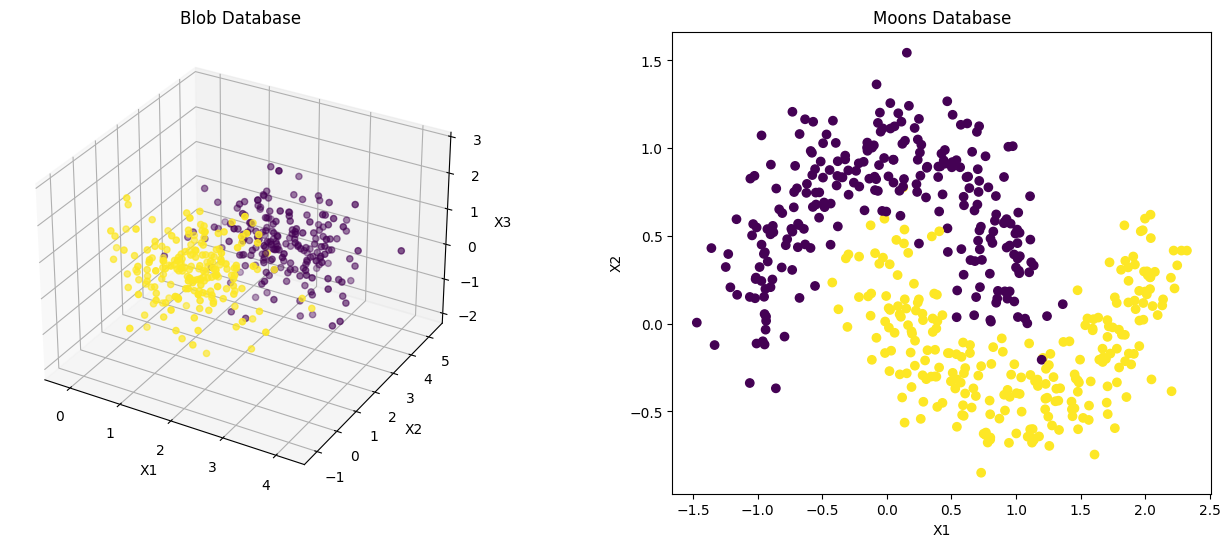

In [4]:
# plot X[0] vs X[1] and colour points according to the class, y
fig = plt.figure(figsize = (16,6))
axes = fig.add_subplot(1,2,1, projection='3d')
axes.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1)
axes.set_title('Blob Database')
axes.set_xlabel('X1')
axes.set_ylabel('X2')
axes.set_zlabel('X3')

axes = fig.add_subplot(1,2,2)
axes.set_title('Moons Database')
axes.scatter(X2[:,0], X2[:,1], c=y2)
axes.set_xlabel('X1')
axes.set_ylabel('X2')


fig.subplots_adjust(left=None,
    bottom=None,
    right=None,
    top=None,
    wspace=0.3,
    hspace=0.1,)

plt.show()

# Part 1
### Creating a Logistic Neural Network (Single Layer Perceptron) using Stochastic Gradient Descent optimisation technique

A `single layer neural network` is a network where there is an input layer and only one node of output layer designed in to the system. No hidden layers are present, and the there are only one layer of weights equivalent to the number of inputs and one bias is present to make predictions. The weights are adjusted according to some optimisation technique(in this case, Stochastic Gradient Descent) which tries to find a minimum some number(in this case, the cost of the error) in order to minimise the errors and find the optimal value for the weights and the bias, which increases the chance to predict the right output in each case.

A neural network is said to be `logistic` when the sigmoid activation function(also called as special form of the logistic function) is used to determine the output label using the data feeded into the network.[1] The sigmoid function can be written as:
$$ \sigma(X) = \frac{1}{1 + e^{z}} $$
where:
* $z$ = $w$.$x$ + $b$
* $w$ = number of weights (size  = number of attributes)
* $x$ = attributes
* $b$ = bias </br>

Gradient Descent is a popular optimisation technique among the deep learning enthusiasts which tries to minimise the error by taking a step "downhill" in the right direction, and then updating the weights and the bias according to the errors calculated. There reaches a point where the error starts to go up, which is not needed by the program, so early stopping is required to stop the program once it reaches the optimum value. One of the variation of this algorithm is the `Stochastic Gradient Descent`, where one random data row is selected to calculate the errors and perform the gradient descent algorithm. 

The error(or the loss) calculated using log loss function for each data point as follows[2]:
$$ Loss = 𝑦(𝑖)*log (\hat{𝑦}(𝑖)) + (1−𝑦(𝑖))*log(1 − \hat{𝑦}(𝑖)) $$
where:
* $i$ = data at the $i^th$ row
* y = actual output
* $\hat{𝑦}$ = predicted output </br>

Each data row has a different loss which is summed up, and then averaged over the length of the data(number of rows present). This computation is called the `cost function` and this is the main determinant of optimisation function. Each time the cost function is calculated for the data, it is compared to the previous cost, to stop when the cost value has reached the optimal value(mimimum). The cost function is as follows[2]:
$$ Cost = J(w,b) = -\frac{1}{N} \sum^{N}_{i=1} (𝑦(𝑖)*log (\hat{𝑦}(𝑖)) + (1−𝑦(𝑖))*log(1 − \hat{𝑦}(𝑖)))$$
where:
* N = number of rows present

The weights are the number associated with each attribute which determines the best path towards the correct prediction. The bias is a constant term determinated to set the slope of the linear line on the hyperplane of the model. To update them, partial derivatives are taken. Partial derivates for weight include the error into data of each attribute, while for bias only the error is determinated.
To update the weights and bias for each data set/point, following formula is used[2]:
$$ w_(j) = w_(j) - \alpha \times \delta w $$
$$ b_(j) = b_(j) - \alpha \times \delta b $$ 
where:
* $\alpha$ = learning rate
* $\delta w$ = partial derivates for weights
* $\delta b$ = partial derivates for bias </br>


Each neural network has some hyperparameters responsible for fine tuning the neural network model made for each scenario. They are responsible to find out the best settings in which the architecture is able to predict with the highest accuracy. The hyperparameters used are:
1. Iterations: The maximum number of times the loop will run to adjust the weights and bias, till the program finds the optimum value.
2. Learning Rate: The rate at which the weights and the bias will be updated. Smaller number means smaller steps towards the optimum value and vice versa.
3. Threshold: There is a value used to activate a sigmoid neuron, called the threshold. We have considered 0.5 to be the threshold for this assignment.
---
References: </br>
[1] https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/ </br>
[2] Deep Learning, "Topic 02: Fundamentals of Neural Networks, Part 1" by Prof. Michael Madden, Chair of Computer Science, Head of Machine Learning Group, University of Galway

In [5]:
#Logistic NN Class
class LogisticNN(object):
    
    #Constructor to initialize iterations, learning rate, and if any random state
    def __init__ (self, lr = 0.01, max_iters = 1000, random_state = None):
        self.weights = None
        self.bias = None
        self.iterations = max_iters
        self.lr = lr

        #A list maintained to store cost for each epoch
        self.cost_list = []

        # Set random state for shuffling and initializing the weights.
        if random_state:
            seed(random_state)


    #Ref: https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/
    #Sigmoid Activation Function
    def sigmoid(self, X):
        z = np.dot(self.weights, X) + self.bias
        return 1/(1 + np.exp(-z))
    
    #Cost Function
    def loss_function(self, y, y_hat):
        loss = -(y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
        return loss

    #Stochastic Gradient Descent
    def gradient(self, X, y, y_hat):
        dW = np.dot(X,(y_hat - y))
        dB = (y_hat - y)
        self.weights -= np.dot(self.lr, dW)
        self.bias -= self.lr * dB 

    #Training Phase
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.normal(loc = 0, scale = 0.1)
        prev_cost = 100000

        #Iteration as per maximum epoch defined
        for i in range(self.iterations):
            loss = 0

            #For each data row, feed forward, activation and SGD to adjust weight
            for data, results in zip(X, y):
                y_hat = (self.sigmoid(data))
                loss += self.loss_function(results, y_hat)
                self.gradient(data, results, y_hat)
                    
            cost = loss / len(y)
                
            if prev_cost - cost < 10**-6:
                break

            prev_cost = cost

            self.cost_list.append(prev_cost)


    #Prediction function to calculate probabilities and results
    def predict(self, X):
        self.results = []
        self.pred_proba = []
        
        #For each data row
        for i in X:
            output = self.sigmoid(i)

            #Giving a sigmoid value, used to calculate ROC curve
            self.pred_proba.append(output)
            pred = 1 if output > 0.5 else 0

            self.results.append(pred)
        
        return self.results

# Part 2
### 2.1 Validating the results of training and selecting the best hyperparameters
The dataset is usually divided into 3 parts: train, validation and test sets. 
1. The train set contains the highest percentage of data so that the model can get better weights and bias values and can perform better on the unknown data values in the future. 
2. The validation set is used to validate: 
    * If the data is overfitting or underfitting, which leads to bad predictions in the future.
    * Which hyperparameter values gives the best results and can be useful in resource planning when new data is introduced, etc.
3. The test set is used to check the predictions and then compare with the original values and see what was the performance of the model, and if needs to be improved, etc.

In [6]:
#Splitting Blob Dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify = y1, random_state=42, shuffle=True)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, stratify = y1_test, random_state=42, shuffle=True)

#Splitting Moon Dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify = y2, random_state=42, shuffle = True)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, stratify = y2_test, random_state=42, shuffle = True)

#
def validation_func(name, X_train, y_train, X_val, y_val):
    lr_list = [0.1, 0.01, 0.001, 1]
    iters_list = [100, 500, 700, 1000, 2000]
    results = pd.DataFrame(columns = ["File Name", "Learning Rate", "Iteration Rate", "F1-Score"])

    for lr, iters in itertools.product(lr_list, iters_list):
        model = LogisticNN(lr, iters, random_state = 42)
        model.fit(X_train, y_train)
        pred = model.predict(X_val)
        f1 = f1_score(y_val, pred)
        row = {"File Name": name, "Learning Rate": lr, "Iteration Rate": iters, "F1-Score": f1}
        results = results.append(row, ignore_index = True)
    return results

blobs_val = validation_func("Blobs Data", X1_train, y1_train, X1_val, y1_val)
moons_val = validation_func("Moons Data", X2_train, y2_train, X2_val, y2_val)

In [7]:
print(blobs_val)

     File Name  Learning Rate Iteration Rate  F1-Score
0   Blobs Data          0.100            100  1.000000
1   Blobs Data          0.100            500  1.000000
2   Blobs Data          0.100            700  1.000000
3   Blobs Data          0.100           1000  1.000000
4   Blobs Data          0.100           2000  1.000000
5   Blobs Data          0.010            100  1.000000
6   Blobs Data          0.010            500  1.000000
7   Blobs Data          0.010            700  1.000000
8   Blobs Data          0.010           1000  1.000000
9   Blobs Data          0.010           2000  1.000000
10  Blobs Data          0.001            100  0.965517
11  Blobs Data          0.001            500  1.000000
12  Blobs Data          0.001            700  1.000000
13  Blobs Data          0.001           1000  1.000000
14  Blobs Data          0.001           2000  1.000000
15  Blobs Data          1.000            100  0.965517
16  Blobs Data          1.000            500  0.965517
17  Blobs 

In [8]:
print(moons_val)

     File Name  Learning Rate Iteration Rate  F1-Score
0   Moons Data          0.100            100  0.911392
1   Moons Data          0.100            500  0.911392
2   Moons Data          0.100            700  0.911392
3   Moons Data          0.100           1000  0.911392
4   Moons Data          0.100           2000  0.911392
5   Moons Data          0.010            100  0.911392
6   Moons Data          0.010            500  0.911392
7   Moons Data          0.010            700  0.911392
8   Moons Data          0.010           1000  0.911392
9   Moons Data          0.010           2000  0.911392
10  Moons Data          0.001            100  0.815789
11  Moons Data          0.001            500  0.900000
12  Moons Data          0.001            700  0.911392
13  Moons Data          0.001           1000  0.911392
14  Moons Data          0.001           2000  0.911392
15  Moons Data          1.000            100  0.821918
16  Moons Data          1.000            500  0.821918
17  Moons 

### 2.2 Checking the Performance of the Models
The models' hyperparameters are chosen from the above validations and now the testing of the model and getting the performance metrics to understand the efficiency of our model is done below.

### 2.2 A For Blob Dataset

In [9]:
LNN_blob = LogisticNN(lr = 0.1, max_iters = 2000)
LNN_blob.fit(X1_train, y1_train)
y1_pred = LNN_blob.predict(X1_test)
score = accuracy_score(y1_test, y1_pred)
score

0.95

In [10]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.90      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



[]

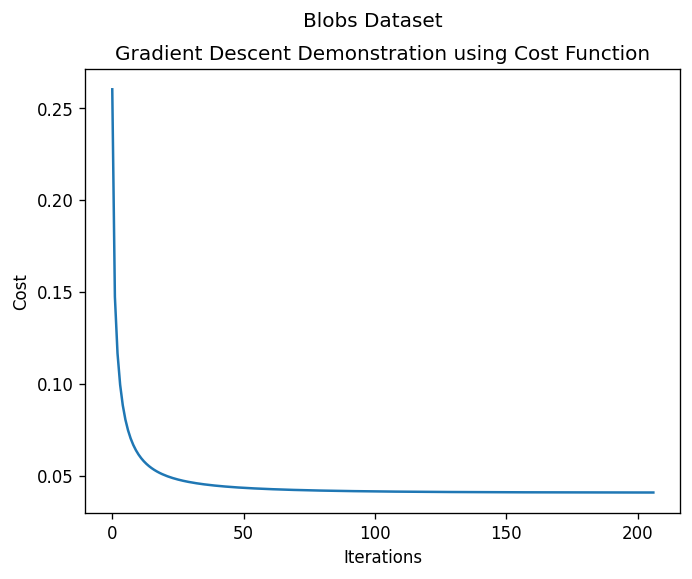

In [11]:
cost_list = LNN_blob.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function")
plt.suptitle("Blobs Dataset")

fig.plot()

### 2.2 B For Moons Dataset

In [12]:
LNN_moons = LogisticNN(lr = 0.1, max_iters = 500)
LNN_moons.fit(X2_train,y2_train)
y2_pred = LNN_moons.predict(X2_test)
score = accuracy_score(y2_test, y2_pred)
score

0.92

In [13]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.92      0.92      0.92        37

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



[]

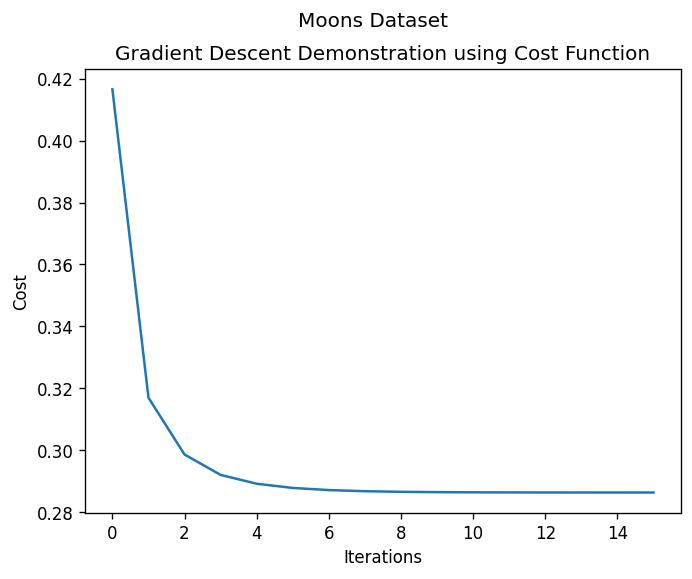

In [14]:
cost_list = LNN_moons.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function")
plt.suptitle("Moons Dataset")

fig.plot()

# Part 3
### 3.1 Implementing a Shallow Neural Network

A `shallow neural network` is a neural network architecture with <b>1 hidden layer</b> between the inputs and the output layer. A hidden layer can have an arbitary number of nodes connected to the inputs and can perform their own computation as per the data and weights. A <i>node</i> is a processing unit in the neural network architecture capable of computing some kind of activations with the input data and it sends it forward into the next layer(in this case, the output layer). The usual approach is to make this a feed-forward network, where the output of each layer is the input to the next layer.

The biggest advantage of increasing the size of the network is to make our model predict on non-linearly separable dataset and get a good prediction on it. The downside is that with each layer increased, there is a chance of overfitting, the computational resources increases and the complexity of the model increases meaning it becomes problematic to understand the calculations at each node in each layer.

There are 2 types of algorithms used to train the network:
1. Forward propagation: Forward propagation algorithm is responsible of putting the input through all the layers of the neural network. In practical execution, the input goes to the first layer, calculates the output at each node, and that outputs are then forwarded to the next layer, in a fully-connected fashion. The weights and biases for each node/input are different and that is the best way to compute the predictions.
2. Back propagation: Back propagation is the technique in which after running the forward propagation on the data, whatever loss is calculated should have an update on the weights accordingly. Now to go back each layer, the derivative of the sigmoid function is calculated which is used to calculate the error in each layer, and accordingly update each weight associated to each node.

The cost function is still calculated at the output as we are interested in getting the output correct i.e minimise the errors at the output.

The input size is passed here to tell the attributes of the dataset, while the hidden size & output size is the number of neurons in the hidden layer and output layer respectively. Accordingly the weights and biases matrix will be created for each layer.

In [15]:
#Shallow Neural Network Class
class NEURAL_NET:
    
    def __init__(self, input_size, hidden_size, op_size,  lr = 0.01, max_iters = 1000, random_state = None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.op_size = op_size
        self.lr = lr
        self.iterations = max_iters

        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None

        # Set random state for shuffling and initializing the weights.
        if random_state:
            seed(random_state)
        
        #A list maintained to store cost for each epoch
        self.cost_list = []

    #Ref: https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/
    #Sigmoid Activation Function
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    #Ref: https://stackoverflow.com/questions/10626134/derivative-of-sigmoid
    #Derivative of the Sigmoid function
    def der_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    #loss Function
    def loss_function(self, y, y_hat):
        loss = -(y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
        return loss

    #Forward propagation
    def forward_propagation(self,X):
        self.z_hidden = X @ self.w1+self.b1
        self.hidden_layer = self.sigmoid(self.z_hidden)
        self.output_layer = self.sigmoid(self.hidden_layer @ self.w2+self.b2)
        return self.output_layer
    
    #Back Propagation
    def backward_propagation(self,X,y,output):
        error = output - y
        d_output = self.hidden_layer.T @ error
        error_hidden = self.der_sigmoid(self.z_hidden) * (error @ self.w2.T)
        d_hidden = X.T @ error_hidden
        self.w2 -= self.lr*d_output
        self.b2 -= self.lr*error
        self.w1 -= self.lr*d_hidden
        self.b1 -= self.lr*error_hidden
        
    #Fit function to train the network
    def fit(self,X, y):
        self.w1 = np.random.uniform(low=0.0, high=0.1, size=(self.input_size, self.hidden_size))
        self.b1 = np.random.uniform(low=0.0, high=0.1, size=(1, self.hidden_size))
        self.w2 = np.random.uniform(low=0.0, high=0.1, size=(self.hidden_size, self.op_size))
        self.b2 = np.random.uniform(low=0.0, high=0.1, size=(1, self.op_size))
        prev_cost = 100000

        for i in range(self.iterations):
            loss = 0

            for data, results in zip(X, y):
                data = np.reshape(data, (1, self.input_size))
                y_hat = self.forward_propagation(data)
                loss += self.loss_function(results, y_hat)
                self.backward_propagation(data, results, y_hat)
            
            cost = np.abs(loss[0][0] / len(y))
            
            if prev_cost - cost < 10**-6:
                break
            prev_cost = cost
            self.cost_list.append(prev_cost)
    
    #Predict method to predict the outcomes
    def predict(self,X):
        self.results = []
        self.pred_proba = []

        for i in range(len(X)):
            x = np.reshape(X[i], (1, self.input_size))
            output=self.forward_propagation(x)
            self.pred_proba.append(output)
            
            pred = 1 if output > 0.5 else 0
            self.results.append(pred)
        return self.results

### 3.2 A Testing the Network on Blob dataset

In [16]:
shl = NEURAL_NET(input_size = X1_train.shape[1],hidden_size=10,op_size=1, lr=0.01, max_iters = 5000, random_state=42)
shl.fit(X1_train,y1_train)

pred1_val = shl.predict(X1_val)
score = accuracy_score(y1_val, pred1_val)
print("Val score: ", score)

pred1_test = shl.predict(X1_test)
score = accuracy_score(y1_test, pred1_test)
print("Test score: ", score)

Val score:  1.0
Test score:  0.95


[]

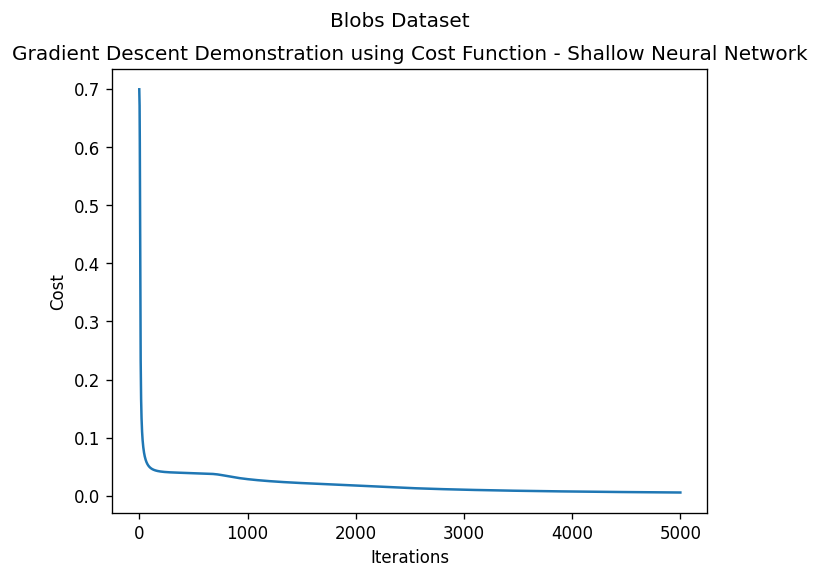

In [17]:
cost_list = shl.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function - Shallow Neural Network")
plt.suptitle("Blobs Dataset")

fig.plot()

### 3.2 B Testing the Network on Moons dataset

In [18]:
shl1 = NEURAL_NET(input_size=X2_train.shape[1],hidden_size=10,op_size=1,lr=0.02, max_iters = 5000, random_state=42)
shl1.fit(X2_train,y2_train)

pred2_val = shl1.predict(X2_val)
score = accuracy_score(y2_val, pred2_val)
print("Val score: ", score)

pred2_val = shl1.predict(X2_test)
score = accuracy_score(y2_test, pred2_val)
print("Test score: ", score)

Val score:  0.96
Test score:  1.0


[]

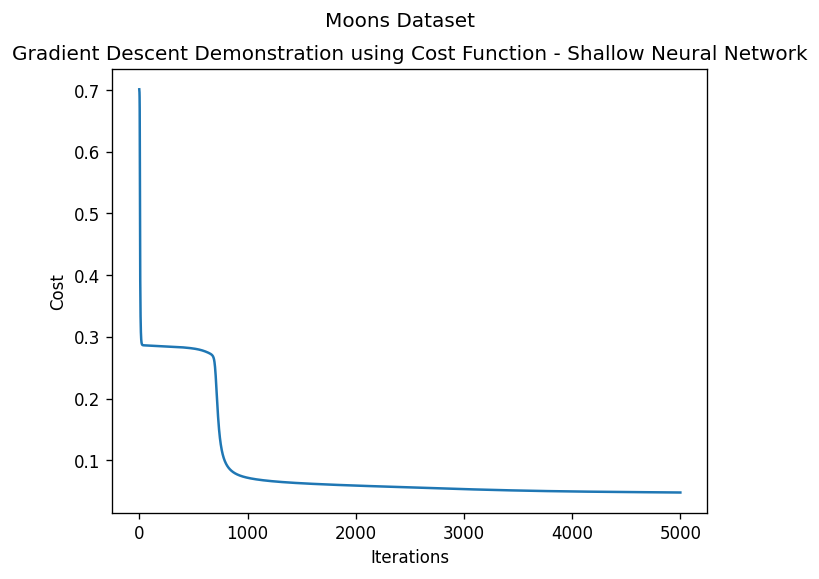

In [19]:
cost_list = shl1.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function - Shallow Neural Network")
plt.suptitle("Moons Dataset")


fig.plot()

# Part 4
### Training the Fashion-MNIST dataset on the Shallow Neural Network
As per the email exchange, we were assigned to classify between Tshirt/Top and Ankle Boots.

Image dataset is a `square/rectangle matrix of pixels` with a value associated with it, and channels telling us if it is a colored image or a grey-scale image. In this exercise, a greyscale image set is used. Each image is represented in a 2d list and computed by converting them into a 1d list and feeded into the network.

Importing MNIST dataset from the details provided in Blackboard Assignment 1 section by Prof. Michael Madden </br>
File Name: Load-Fashion-MNIST.ipynb

In [20]:
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [22]:
(train_imgs, train_labels) = load_mnist('C:/Users/Admin/Downloads/MNIST/', 'train')
(test_imgs, test_labels) = load_mnist('C:/Users/Admin/Downloads/MNIST/', 't10k')

t_shirt_label = 0
ankle_boot_label = 9
my_images_train = []
my_labels_train=[]
my_images_test=[]
my_labels_test=[]

for i in range(len(train_imgs)):
    if train_labels[i] in [t_shirt_label,ankle_boot_label]:
        my_images_train.append(train_imgs[i])
        my_labels_train.append(train_labels[i])
for i in range(len(test_imgs)):
    if test_labels[i] in [t_shirt_label,ankle_boot_label]:
        my_images_test.append(test_imgs[i])
        my_labels_test.append(test_labels[i])

for i in range(len(my_labels_train)):
    if my_labels_train[i] == 9:
        my_labels_train[i] = 1
for i in range(len(my_images_test)):
    if my_labels_test[i] == 9:
        my_labels_test[i] = 1



### 4.1 Training the dataset without Standard Scaler Normalization technique


In [24]:
MNIST = NEURAL_NET(input_size= len(my_images_train[0]), hidden_size = 100, op_size=1, lr=0.01, max_iters = 100, random_state=42)
MNIST.fit(my_images_train,my_labels_train)

In [25]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
        
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

In [27]:
predicted_imgs = MNIST.predict(my_images_test)
print(classification_report(my_labels_test, predicted_imgs))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



### 4.2 Training the dataset with Standard Scalar Normalization technique

In [28]:
options = [0,9]

train_df = pd.DataFrame(train_imgs)
train_df['Labels'] = train_labels

filtered_train_Data = train_df[train_df['Labels'] .isin(options)] 

test_df = pd.DataFrame(test_imgs)
test_df['Labels'] = test_labels
filtered_test_Data = test_df[test_df['Labels'] .isin(options)] 

encode_labels = {0:0,9:1}
filtered_train_Data['Labels'] = filtered_train_Data['Labels'].map(encode_labels)
filtered_test_Data['Labels'] = filtered_test_Data['Labels'].map(encode_labels)

filtered_train_labels = filtered_train_Data['Labels']
filtered_train_imgs = filtered_train_Data.drop(['Labels'],axis=1)

filtered_test_labels = filtered_test_Data['Labels']
filtered_test_imgs = filtered_test_Data.drop(['Labels'],axis=1)

In [29]:
scaler = StandardScaler()
filtered_train_imgs1 = scaler.fit_transform(filtered_train_imgs)
filtered_test_imgs1 = scaler.transform(filtered_test_imgs)

In [88]:
MNIST_scaled = NEURAL_NET(input_size= len(filtered_train_imgs1[0]), hidden_size = 100, op_size=1, lr=0.0001, max_iters = 100, random_state=42)
MNIST_scaled.fit(np.array(filtered_train_imgs1),np.array(filtered_train_labels))

In [89]:
predicted_imgs1 = MNIST_scaled.predict(np.array(filtered_test_imgs1))
score = accuracy_score(np.array(filtered_test_labels), predicted_imgs1)
print("Test score: ", score)
print("Classification Report: ")
print(classification_report(np.array(filtered_test_labels), predicted_imgs1))

Test score:  0.9995
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[]

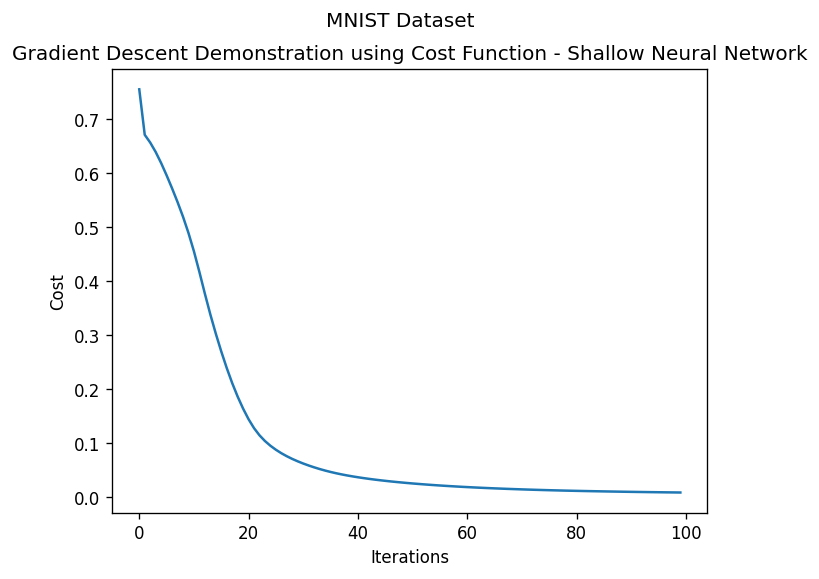

In [90]:
cost_list = MNIST_scaled.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function - Shallow Neural Network")
plt.suptitle("MNIST Dataset")


fig.plot()

#### Importance of Using Normalization :

Reference: Michael Madden Deep Learning Week 04 </br>
Using Normalization technique like Standard Scalar(z-Norm) is good to use for Unstructured Data like images which contains huge variance
in values.

### Part 5: Deep Learning Enhancements


Soumitra Koustubh Manavi : 

Reference: </br>
1] Michael Madden - Week 04 - L2 Regularization - Backprop</br>
2] https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9318195</br>
3] https://www.kaggle.com/code/daeyeopkim/l2-regularization-from-scratch</br>
4] https://www.surfactants.net/l2-regularization-a-method-to-control-overfitting-in-neural-networks/#:~:text=L2%20regularization%20is%20a%20method%20used%20to%20control,network%2C%20we%20need%20to%20modify%20the%20loss%20function.

**Arbitary hidden layer [1][2]**: Arbitary 1 hidden layer added with same hidden size as shallow neural network.</br>

The enhancements of adding neurons and hidden layers helps in **reducing the error** and increasing the accuracy during training. Choosing the hidden layers depends on the model as the time complexity increases with increase in hidden layers. For a model, more hidden layers can increase of overfitting and using less hidden layers can cause underfitting.

**L2 regularization [3][4]:** Implementation of L2 regularization to avoid overfitting.</br>

The enhancement of L2 regularization is used to avoid overfitting of the model **penalizing the sum of squared weights** and helps in improving the performance of the training with generalization of the model. This also helps in generalizing the model avoiding high values of the weights. </br>
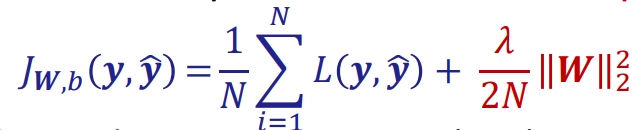


In [73]:
#Shallow Neural Network Class
class enhanced_NEURAL_NET:
    
    def __init__(self, input_size, hidden_size, alpha,op_size,  lr = 0.01, max_iters = 1000, random_state = None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.op_size = op_size
        self.lr = lr
        self.iterations = max_iters
        self.alpha = alpha

        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None

        # Set random state for shuffling and initializing the weights.
        if random_state:
            seed(random_state)
        
        #A list maintained to store cost for each epoch
        self.cost_list = []

    #Ref: https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/
    #Sigmoid Activation Function
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    #Ref: https://stackoverflow.com/questions/10626134/derivative-of-sigmoid
    #Derivative of the Sigmoid function
    def der_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    #loss Function
    def cost_function(self, y, y_hat):
        m=1 # Stochastic Gradient Descent
        cost = -(y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
        #Reference : Michael Madden Week 4- L2 Regularization ,
        #Reference : https://www.youtube.com/watch?v=R0Dz8R0wgBs
        L2_regularization  = (self.alpha/(2*m))*(np.sum(np.square(self.w1)+np.sum(np.square(self.w2)+np.sum(np.square(self.w3)))))
        regularized_cost = cost+L2_regularization
        return regularized_cost

    #Forward propagation
    def forward_propagation(self,X):

        # arbitary no of hidden layers
        self.z_hidden1 = X @ self.w1+self.b1
        self.hidden_layer1 = self.sigmoid(self.z_hidden1)
        self.z_hidden2 = self.hidden_layer1 @ self.w2+self.b2
        self.hidden_layer2 = self.sigmoid(self.z_hidden2)
        self.output_layer = self.sigmoid(self.hidden_layer2 @ self.w3+self.b3)
        return self.output_layer
    
    #Back Propagation
    def backward_propagation_with_L2(self,X,y,output):
        
        # L2 Regularization - Back Propogation
        # Reference: https://www.kaggle.com/code/daeyeopkim/l2-regularization-from-scratch
        #Reference : Michael Madden Week 4- L2 Regularization 
        error = output - y
        delta_output = self.hidden_layer2.T @ error + self.alpha*self.w3

        error_hidden_layer_2 = self.der_sigmoid(self.z_hidden2) * (error @ self.w3.T)
        delta_hidden2 =  self.hidden_layer1.T @ error_hidden_layer_2+self.alpha*self.w2

        error_hidden_layer_1 = self.der_sigmoid(self.z_hidden1) * (error_hidden_layer_2 @ self.w2.T)
        delta_hidden1 = X.T @ error_hidden_layer_1+self.alpha*self.w1
      
        self.w3 -= self.lr*(delta_output)
        self.b3 -= self.lr*error
        self.w2 -= self.lr*(delta_hidden2)
        self.b2 -= self.lr*error_hidden_layer_2
        self.w1 -= self.lr*(delta_hidden1)
        self.b1 -= self.lr*error_hidden_layer_1
        
    #Fit function to train the network
    def fit(self,X, y):

        self.w1 = np.random.uniform(low=0.0, high=1, size=(self.input_size,self.hidden_size))
        self.b1 = np.random.uniform(low=0.0, high=1, size=(1,self.hidden_size))

        self.w2 = np.random.uniform(low=0.0, high=1, size=(self.hidden_size,self.hidden_size))
        self.b2 = np.random.uniform(low=0.0, high=1, size=(1,self.hidden_size))

        self.w3 = np.random.uniform(low=0.0, high=1, size=(self.hidden_size,self.op_size))
        self.b3 = np.random.uniform(low=0.0, high=1, size=(1,self.op_size))
        prev_cost = 100000

        for i in range(self.iterations):
            loss = 0
            for data, results in zip(X, y):
                data = np.reshape(data, (1, self.input_size))
                y_hat = self.forward_propagation(data)
                loss += self.cost_function(results, y_hat)
                self.backward_propagation_with_L2(data, results, y_hat)
            cost = np.abs(loss[0][0] / len(y))
            if prev_cost - cost < 10**-6:
                break
            prev_cost = cost
            self.cost_list.append(prev_cost)
    
    #Predict method to predict the outcomes
    def predict(self,X):
        self.results = []
        self.pred_proba = []

        for i in range(len(X)):
            x = np.reshape(X[i], (1, self.input_size))
            output=self.forward_propagation(x)
            
            self.pred_proba.append(output)
            
            pred = 1 if output > 0.5 else 0
            self.results.append(pred)
        return self.results

In [93]:
enhanced_model = enhanced_NEURAL_NET(input_size= len(filtered_train_imgs1[0]), hidden_size = 100, alpha = 1e-10,op_size=1, lr=0.0001, max_iters = 100, random_state=42)
enhanced_model.fit(np.array(filtered_train_imgs1),np.array(filtered_train_labels))

In [94]:
enhc_predicted_imgs = enhanced_model.predict(np.array(filtered_test_imgs1))
score = accuracy_score(np.array(filtered_test_labels), enhc_predicted_imgs)
print("Test score: ", score)
print("Classification Report: ")
print(classification_report(np.array(filtered_test_labels), enhc_predicted_imgs))

Test score:  0.5655
Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.61      0.59      1000
           1       0.57      0.52      0.54      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.56      2000
weighted avg       0.57      0.57      0.56      2000



[]

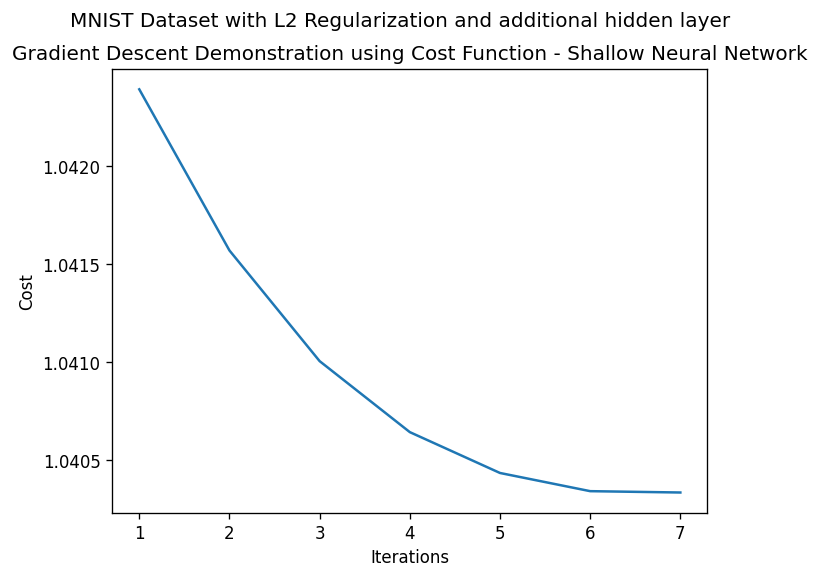

In [95]:
cost_list = enhanced_model.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration using Cost Function - Shallow Neural Network")
plt.suptitle("MNIST Dataset with L2 Regularization and additional hidden layer")


fig.plot()

Jash Prakash Rana:

Back Prop with Momentum: 
The enhancement of using Back Prop using Momentum helps in reducing the change of getting stuck in local optima and enhances the loss to reduce upto **global optima**. There should not be high momentum as well which can add risk of skipping the global optima during gradient descent.

On first Iteration:
$$ V_\delta w = \delta w $$
$$ V_\delta b = \delta b $$
After First Iteration:
$$ V_\delta w = (1-\beta)*\delta w + \beta * V_\delta w $$
$$ V_\delta b = (1-\beta)*\delta b + \beta * V_\delta b $$
where:
* $V$ = velocity
* $\delta w$ = Partial Derivative of Weights
* $\delta b$ = Partial Derivative of Biases
* $\beta$ = Momentum

In [96]:
#Shallow Neural Network Class
class MomentumNN:
    
    def __init__(self, input_size, hidden_size, op_size,  lr = 0.01, max_iters = 1000, momentum = 0, random_state = None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.op_size = op_size
        self.lr = lr
        self.iterations = max_iters
        self.velocity_w2 = None
        self.velocity_w1 = None
        self.velocity_b2 = None
        self.velocity_b1 = None
        self.momentum = momentum

        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None

        # Set random state for shuffling and initializing the weights.
        if random_state:
            seed(random_state)
        
        #A list maintained to store cost for each epoch
        self.cost_list = []

    #Ref: https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/
    #Sigmoid Activation Function
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))

    #Derivative of the Sigmoid function
    def der_sigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    #loss Function
    def loss_function(self, y, y_hat):
        loss = -(y * np.log(y_hat)) - ((1-y) * np.log(1-y_hat))
        return loss

    #Forward propagation
    def forward_propagation(self,X):
        self.z_hidden = X @ self.w1+self.b1
        self.hidden_layer = self.sigmoid(self.z_hidden)
        self.output_layer = self.sigmoid(self.hidden_layer @ self.w2+self.b2)
        return self.output_layer
    
    #Back Propagation
    def backward_propagation(self,X,y,output, num):
        error = output - y
        d_output = self.hidden_layer.T @ error
        error_hidden = self.der_sigmoid(self.z_hidden) * (error @ self.w2.T)
        d_hidden = X.T @ error_hidden
        
        if num == 0:
            self.w2 -= self.lr*d_output
            self.b2 -= self.lr*error
            self.w1 -= self.lr*d_hidden
            self.b1 -= self.lr*error_hidden
            
        else:
            self.velocity_w2 = (1-self.momentum) * self.w2 + self.momentum * self.velocity_w2
            self.velocity_w1 = (1-self.momentum) * self.w1 + self.momentum * self.velocity_w1
            self.velocity_b2 = (1-self.momentum) * self.b2 + self.momentum * self.velocity_b2
            self.velocity_b1 = (1-self.momentum) * self.b1 + self.momentum * self.velocity_b1

            self.w2 -= self.lr * self.velocity_w2
            self.b2 -= self.lr * self.velocity_b2
            self.w1 -= self.lr * self.velocity_w1
            self.b1 -= self.lr * self.velocity_b1

    #Fit function to train the network
    def fit(self, X, y):
        self.velocity_w2, self.velocity_w1, self.velocity_b2, self.velocity_b1 = 0, 0, 0, 0
        self.w1 = np.random.uniform(low=0.0, high=0.1, size=(self.input_size, self.hidden_size))
        self.b1 = np.random.uniform(low=0.0, high=0.1, size=(1, self.hidden_size))
        self.w2 = np.random.uniform(low=0.0, high=0.1, size=(self.hidden_size, self.op_size))
        self.b2 = np.random.uniform(low=0.0, high=0.1, size=(1, self.op_size))
        prev_cost = 100000
        i = 0

        for i in range(self.iterations):
            loss = 0

            for data, results in zip(X, y):
                data = np.reshape(data, (1, self.input_size))
                y_hat = self.forward_propagation(data)
                loss += self.loss_function(results, y_hat)
                self.backward_propagation(data, results, y_hat, i)
                i+=1
            
            cost = np.abs(loss[0][0] / len(y))
            
            if prev_cost - cost < 10**-6:
                break
            
            prev_cost = cost

            self.cost_list.append(prev_cost)
    
    #Predict method to predict the outcomes
    def predict(self,X):
        self.results = []
        self.pred_proba = []

        for i in range(len(X)):
            x = np.reshape(X[i], (1, self.input_size))
            output=self.forward_propagation(x)
            
            self.pred_proba.append(output)
            
            pred = 1 if output > 0.5 else 0
            self.results.append(pred)
        return self.results

1. Training on Blobs Dataset

In [97]:
momentum1 = MomentumNN(input_size = X1_train.shape[1],hidden_size=10,op_size=1, lr=0.01, max_iters = 5000, momentum = 0.1, random_state=42)
momentum1.fit(X1_train, y1_train)

In [98]:
predict1 = momentum1.predict(X1_test)
print(classification_report(y1_test, predict1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.50      1.00      0.67        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



Text(0.5, 0.98, 'Blobs Dataset')

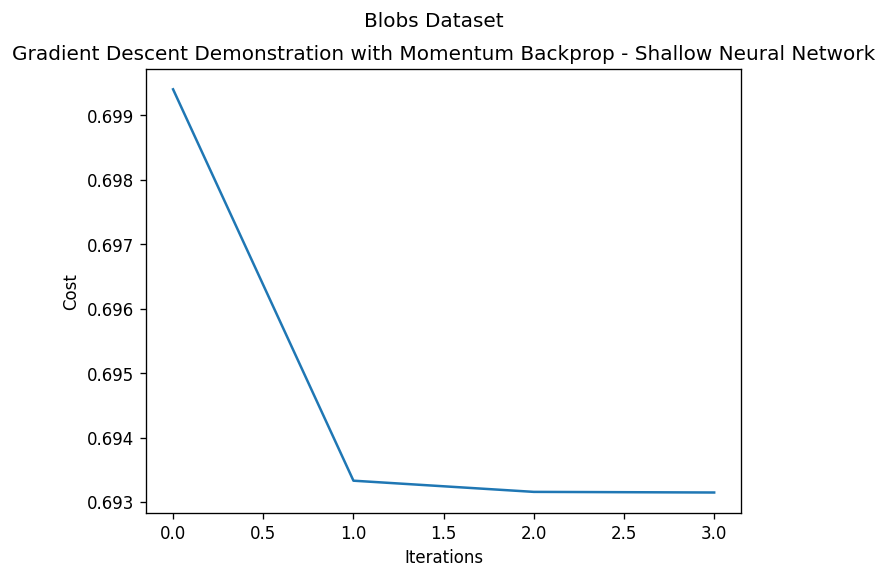

In [99]:
cost_list = momentum1.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration with Momentum Backprop - Shallow Neural Network")
plt.suptitle("Blobs Dataset")

2. Training on Moons Dataset

In [100]:
momentum2 = MomentumNN(input_size = X2_train.shape[1],hidden_size=10,op_size=1, lr=0.01, max_iters = 5000, momentum = 0.1, random_state=42)
momentum2.fit(X2_train, y2_train)

In [101]:
predict2 = momentum2.predict(X2_test)
print(classification_report(y2_test, predict2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.49      1.00      0.66        37

    accuracy                           0.49        75
   macro avg       0.25      0.50      0.33        75
weighted avg       0.24      0.49      0.33        75



Text(0.5, 0.98, 'Moons Dataset')

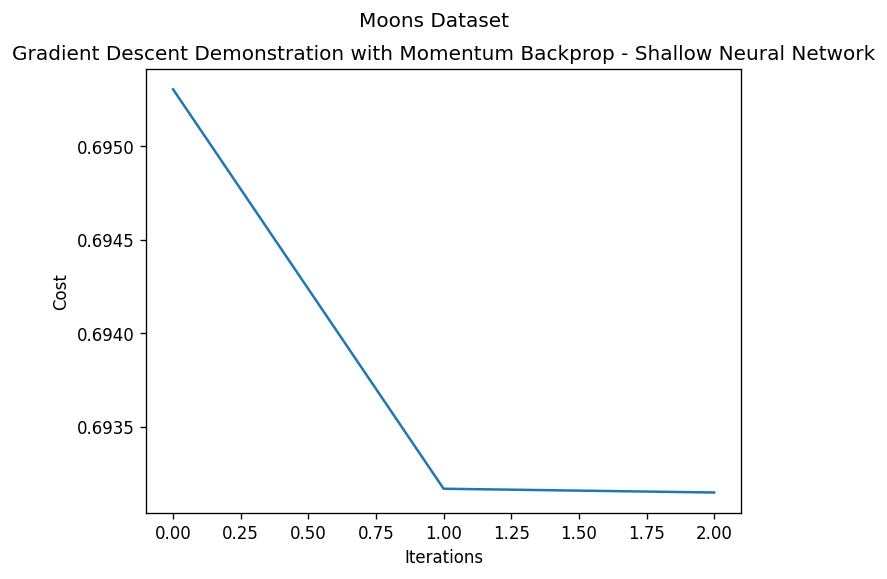

In [102]:
cost_list = momentum2.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration with Momentum Backprop - Shallow Neural Network")
plt.suptitle("Moons Dataset")

In [103]:
MNIST_momentum = MomentumNN(input_size= len(filtered_train_imgs1[0]), hidden_size = 100, op_size=1, lr=0.1, max_iters = 100, momentum = 0.01, random_state=42)
MNIST_momentum.fit(np.array(filtered_train_imgs1),np.array(filtered_train_labels))

In [104]:
predict3 = MNIST_momentum.predict(np.array(filtered_test_imgs1))
print(classification_report(np.array(filtered_test_labels), predict3))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



Text(0.5, 0.98, 'MNIST Dataset')

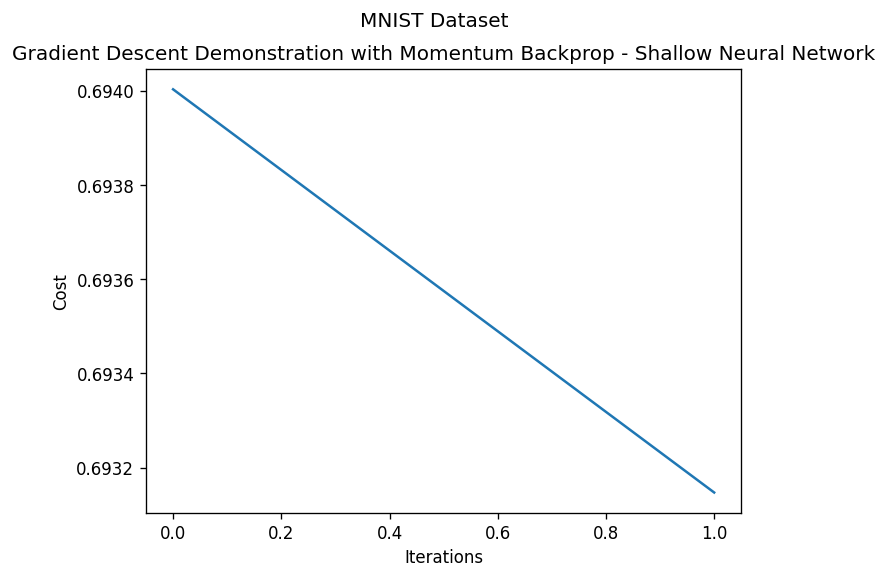

In [105]:
cost_list = MNIST_momentum.cost_list
fig = plt.figure(dpi = 120)
fig = sns.lineplot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Demonstration with Momentum Backprop - Shallow Neural Network")
plt.suptitle("MNIST Dataset")